# Comparing Cities

In [5]:
import pandas as pd

In [1]:
from cleaning import cleaning_city

In [13]:
cities_list = ['Austin','Asheville','Boston','Chicago','Columbus','DC','Denver','Los Angeles','Nashville','New Orleans','NYC','Portland','San Francisco','Seattle']

In [14]:
for i in cities_list:
    cwd = 'data/{}'.format(i)
    cleaning_city(cwd,i)

In [6]:
Asheville_df = pd.read_pickle('data/Asheville/city_listings_combAsheville.pkl')

In [15]:
Austin_df = pd.read_pickle('data/Austin/city_listings_combAustin.pkl')

<AxesSubplot:>

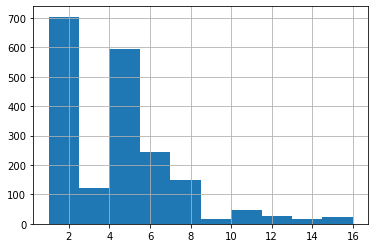

In [10]:
Asheville_df['accommodates'].hist()